In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import scipy
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.python.training import training_util

print(tf.__version__)
tf.logging.set_verbosity(tf.logging.INFO)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

c:\users\hrafiq\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.4.0


In [2]:
df = pd.read_csv("GRIR_GCP_Data.csv", sep=",")

In [3]:
df.head(10)

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
0,ML01,3,1,1,30,1,A,0,80,0,90,-80,-38100,1
1,ML01,3,1,1,30,1,A,0,107,0,177,-107,-41600,0
2,ML01,3,1,1,30,1,A,0,107,0,152,-107,-27600,1
3,ML01,3,1,1,30,1,A,0,96,0,79,-96,-13800,1
4,ML01,3,1,1,30,1,A,0,146,0,192,-146,-73500,0
5,ML01,3,1,1,60,1,A,0,189,0,139,-189,-26600,1
6,ML01,3,1,1,60,1,A,0,183,0,48,-183,-69200,0
7,ML01,3,1,1,60,1,A,0,159,0,195,-159,-73600,0
8,ML01,3,1,1,60,1,A,0,185,0,79,-185,-59500,0
9,ML01,3,1,1,60,1,A,0,91,0,168,-91,-4700,1


In [4]:
df.describe()

,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
count,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0
mean,2.6,1.5,1.1,60.3,1.3,65.9,94.1,103.1,89.5,-28.2,-6716.3,0.4
std,1.1,0.5,0.3,24.4,0.5,63.0,62.4,82.0,75.0,63.2,22797.4,0.5
min,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,-200.0,-75000.0,0.0
25%,2.0,1.0,1.0,30.0,1.0,0.0,54.0,0.0,10.0,-56.0,-9600.0,0.0
50%,3.0,1.0,1.0,60.0,1.0,55.0,99.0,112.0,82.0,-2.0,-546.0,0.0
75%,4.0,2.0,1.0,90.0,2.0,121.0,146.0,172.0,154.0,11.0,5482.0,1.0
max,4.0,2.0,2.0,90.0,2.0,200.0,200.0,268.0,242.0,74.0,59200.0,1.0


In [5]:
df.columns

Index(['WERKS', 'SCENARIO', 'KTOKK', 'VSTATU', 'VPATD', 'EKORG', 'EKGRP',
       'TOTGRQTY', 'TOTIRQTY', 'NODLGR', 'NODLIR', 'DIFGRIRD', 'DIFGRIRV',
       'STATUS'],
      dtype='object')

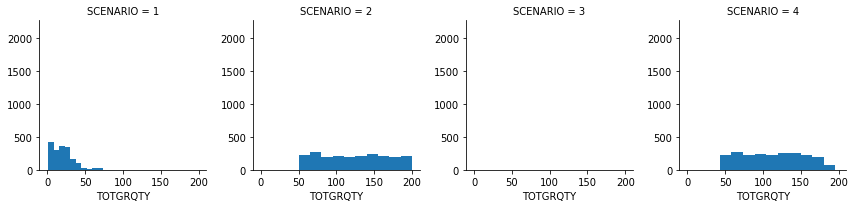

In [6]:
#Facet1
g = sns.FacetGrid(df, col="SCENARIO")
g = g.map(plt.hist, "TOTGRQTY")
plt.show()

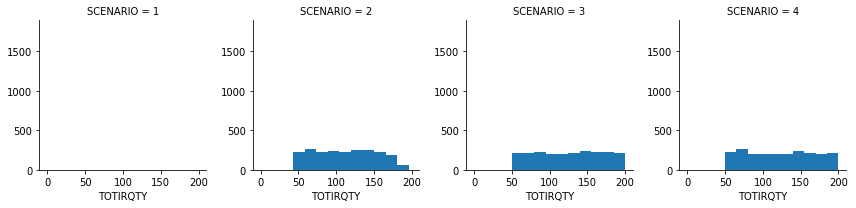

In [7]:
#Facet1
g = sns.FacetGrid(df, col="SCENARIO")
g = g.map(plt.hist, "TOTIRQTY")
plt.show()

In [8]:
#Filter out scenario = 3 ( It has TOTGRQTY == 0 )
df_s1 = df[df['SCENARIO'].eq(3) & df['TOTGRQTY'].eq(0)]
df_s1.head()

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
0,ML01,3,1,1,30,1,A,0,80,0,90,-80,-38100,1
1,ML01,3,1,1,30,1,A,0,107,0,177,-107,-41600,0
2,ML01,3,1,1,30,1,A,0,107,0,152,-107,-27600,1
3,ML01,3,1,1,30,1,A,0,96,0,79,-96,-13800,1
4,ML01,3,1,1,30,1,A,0,146,0,192,-146,-73500,0


In [9]:
#Mark some columns as categorical so that TF treats them as categorical
for col_cat in ['SCENARIO','KTOKK','VSTATU','EKORG']:
    df[col_cat] = df[col_cat].astype('str') #Very important to keep this as STR -> Tensorflow treats only STR as categorical
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       8279 non-null object
SCENARIO    8279 non-null object
KTOKK       8279 non-null object
VSTATU      8279 non-null object
VPATD       8279 non-null int64
EKORG       8279 non-null object
EKGRP       8279 non-null object
TOTGRQTY    8279 non-null int64
TOTIRQTY    8279 non-null int64
NODLGR      8279 non-null int64
NODLIR      8279 non-null int64
DIFGRIRD    8279 non-null int64
DIFGRIRV    8279 non-null int64
STATUS      8279 non-null int64
dtypes: int64(8), object(6)
memory usage: 905.6+ KB


In [10]:
#Split dataset -> Split 10 times and choose the one with best P values( Significance test )
p_res = {}
t_res = []
for i in range(10):
    np.random.seed(seed=i) #makes result reproducible
    msk = np.random.rand(len(df)) < 0.8
    X_train = df[msk]
    X_test = df[~msk]

    #Run Significance Tests on both the distributions( Train and Test ) for all numerical attributes
    p_res = {}
    for c_ in X_train.columns:
        if not X_train[c_].dtype == 'object':
            try:
                _, a = scipy.stats.ks_2samp(X_train[c_].values,X_test[c_].values)
                #print('P-value for column {} is {}'.format(c_.upper(), a))
                p_res['Random'] = i
                p_res[c_] = a
            except:
                p_res['Random'] = i
                p_res[c_] = 'Error'
    t_res.append(p_res)

p_df = pd.DataFrame(t_res)
p_df

,DIFGRIRD,DIFGRIRV,NODLGR,NODLIR,Random,STATUS,TOTGRQTY,TOTIRQTY,VPATD
0,0.2,0.1,0.3,0.3,0,0.2,0.3,0.6,0.9
1,0.1,0.1,0.1,0.3,1,1.0,0.0,0.8,1.0
2,1.0,0.9,0.8,1.0,2,1.0,0.9,0.4,0.8
3,0.5,0.2,0.1,0.1,3,1.0,0.4,0.9,1.0
4,1.0,0.6,0.5,0.5,4,1.0,1.0,0.9,1.0
5,0.7,0.4,0.2,0.4,5,0.8,0.7,0.2,1.0
6,0.5,0.3,0.4,1.0,6,1.0,0.9,0.7,0.3
7,0.8,0.3,0.7,0.6,7,0.7,0.9,0.8,0.6
8,0.8,0.6,1.0,1.0,8,1.0,0.0,0.3,0.4
9,1.0,0.5,0.4,0.4,9,1.0,0.0,0.1,1.0


In [11]:
#Prepare train and test data set
np.random.seed(seed=2) #makes result reproducible
msk = np.random.rand(len(df)) < 0.8
traindf = df[msk]
evaldf = df[~msk]
#evaldf[evaldf['STATUS'] == 1]

In [12]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       6629 non-null object
SCENARIO    6629 non-null object
KTOKK       6629 non-null object
VSTATU      6629 non-null object
VPATD       6629 non-null int64
EKORG       6629 non-null object
EKGRP       6629 non-null object
TOTGRQTY    6629 non-null int64
TOTIRQTY    6629 non-null int64
NODLGR      6629 non-null int64
NODLIR      6629 non-null int64
DIFGRIRD    6629 non-null int64
DIFGRIRV    6629 non-null int64
STATUS      6629 non-null int64
dtypes: int64(8), object(6)
memory usage: 776.8+ KB


In [13]:
evaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 16 to 8272
Data columns (total 14 columns):
WERKS       1650 non-null object
SCENARIO    1650 non-null object
KTOKK       1650 non-null object
VSTATU      1650 non-null object
VPATD       1650 non-null int64
EKORG       1650 non-null object
EKGRP       1650 non-null object
TOTGRQTY    1650 non-null int64
TOTIRQTY    1650 non-null int64
NODLGR      1650 non-null int64
NODLIR      1650 non-null int64
DIFGRIRD    1650 non-null int64
DIFGRIRV    1650 non-null int64
STATUS      1650 non-null int64
dtypes: int64(8), object(6)
memory usage: 193.4+ KB


In [14]:
#Files To be used in Tensorflow pipeline dataset API
traindf.to_csv("grir_train.csv", index=False, header=False)
evaldf.to_csv("grir_eval.csv", index=False, header=False)

In [15]:
######################################## Tensorflow Pipeline building and Modeling ############################################

In [16]:
#Tf version of Add_new_features
def add_new_features_tf(df_temp):   
    #Add any feature engineering or new column here
    df_temp['grminusirbyvpatd'] = ( df_temp['TOTGRQTY'] - df_temp['TOTIRQTY'] ) / df_temp['VPATD']
    
    df_temp['difgrirdbytotgrqty'] = tf.where( tf.not_equal(tf.cast(df_temp['TOTGRQTY'], tf.float32), tf.cast(0, tf.float32)),
                                              tf.cast(tf.divide(df_temp['DIFGRIRD'], df_temp['TOTGRQTY']), tf.float32),
                                              tf.cast(tf.zeros_like(df_temp['DIFGRIRD']), tf.float32))
    return df_temp

In [17]:
#Panda version of Add_new_features
def add_new_features_panda(df_temp):   
    def feat_difgrirdbytotgrqty(row):
        if row['TOTGRQTY'] == 0:
            return 0
        else:
            return row['DIFGRIRD'] / row['TOTGRQTY']
    
    #Add any feature engineering or new column here
    df_temp['grminusirbyvpatd'] = ( df_temp['TOTGRQTY'] - df_temp['TOTIRQTY'] ) / df_temp['VPATD']
    
    df_temp['difgrirdbytotgrqty'] = df_temp.apply(feat_difgrirdbytotgrqty, axis=1)
    return df_temp

In [18]:
# Test add_new_features for X_train
df_dummy = add_new_features_panda(traindf.copy())
print(df_dummy.head())
print(df_dummy.describe())

  WERKS SCENARIO KTOKK VSTATU  VPATD EKORG EKGRP  TOTGRQTY  TOTIRQTY  NODLGR  \
0  ML01        3     1      1     30     1     A         0        80       0   
1  ML01        3     1      1     30     1     A         0       107       0   
2  ML01        3     1      1     30     1     A         0       107       0   
3  ML01        3     1      1     30     1     A         0        96       0   
4  ML01        3     1      1     30     1     A         0       146       0   

   NODLIR  DIFGRIRD  DIFGRIRV  STATUS  grminusirbyvpatd  difgrirdbytotgrqty  
0      90       -80    -38100       1              -2.7                 0.0  
1     177      -107    -41600       0              -3.6                 0.0  
2     152      -107    -27600       1              -3.6                 0.0  
3      79       -96    -13800       1              -3.2                 0.0  
4     192      -146    -73500       0              -4.9                 0.0  
       VPATD  TOTGRQTY  TOTIRQTY  NODLGR  NODLIR  D

In [19]:
#RETURNS a pre-processing( New columns + Transformations ) function to be used inside pipeline
def create_add_engineered_fn(df):
    #Add new features in the set so that it's details can be copied to parameters of fn_add_engineered
    df = add_new_features_panda(df)
    
    #Get min max for each numerical column to use for scaling
    cols_mean = {}
    cols_std = {}
    num_feats = []
    for col_norm in list(df.columns):
        if not df[col_norm].dtype == 'object' and not col_norm in ['STATUS']:
            cols_mean[col_norm] = df[col_norm].mean()
            cols_std[col_norm] = df[col_norm].std()
            num_feats.append(col_norm)

    #Pass all the above calculated values to be used by main function which will be called in Pipeline
    def fn_add_engineered(features, cols_mean = cols_mean, cols_std = cols_std, num_feats = num_feats):
        #Save value here for 0-1 scaling during training and serving
#         print("mean", cols_mean)
#         print("std", cols_std)
#         print(features)
        
        #Add new features AGAIN as the function add_engineered will be called with data
        features = add_new_features_tf(features)
        
        #Normalize few numerical columns
        for col_norm in list(num_feats):
            mean_value = cols_mean[col_norm]
            std_value = cols_std[col_norm]
            features[col_norm] = (features[col_norm] - mean_value) / std_value

#         print("..... Done processing ")
#         print(features)
        return features
    
    return fn_add_engineered

#Generate pre-processing function as per training data
add_engineered = create_add_engineered_fn(traindf.copy())

In [20]:
#Test run add_engineered on copy of X_test
# dummy = traindf.copy()
# dummy = add_engineered(dummy)
# dummy.describe()

In [21]:
# Define your feature columns
def create_feature_cols():
#   lat_buck = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('latitude'), 
#                                                  boundaries = np.arange(32.0, 42, 1).tolist())
#   long_buck = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('longitude'),
#                                                   boundaries = np.arange(1, 52, 1).tolist())
    werks_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='WERKS',
            vocabulary_list=['ML01','ML02','ML03'])
    scenario_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='SCENARIO',
            vocabulary_list=['1','2','3','4'])
    ktokk_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='KTOKK',
            vocabulary_list=['1','2'])    
    vstatu_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='VSTATU',
            vocabulary_list=['1','2'])
    ekorg_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='EKORG',
            vocabulary_list=['1','2'])   
    ekgrp_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='EKGRP',
            vocabulary_list=['A','B','C'])
    
#     werks_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='WERKS',hash_bucket_size=3)
#     scenario_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='SCENARIO',hash_bucket_size=4)
#     ktokk_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='KTOKK',hash_bucket_size=2)
#     vstatu_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='VSTATU',hash_bucket_size=2)
#     ekorg_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='EKORG',hash_bucket_size=2)
#     ekgrp_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='EKGRP',hash_bucket_size=3)

    return [
        tf.feature_column.indicator_column(werks_c),
        tf.feature_column.indicator_column(scenario_c),
        tf.feature_column.indicator_column(ktokk_c),
        tf.feature_column.indicator_column(vstatu_c),
        tf.feature_column.indicator_column(ekorg_c),
        tf.feature_column.indicator_column(ekgrp_c),
        tf.feature_column.numeric_column('VPATD'),
        tf.feature_column.numeric_column("TOTGRQTY"),
        tf.feature_column.numeric_column("TOTIRQTY"),
        tf.feature_column.numeric_column("NODLGR"),
        tf.feature_column.numeric_column("NODLIR"),
        tf.feature_column.numeric_column("DIFGRIRD"),
        tf.feature_column.numeric_column("grminusirbyvpatd"),
        tf.feature_column.numeric_column("difgrirdbytotgrqty"),
        tf.feature_column.numeric_column("DIFGRIRV")
  ]

In [22]:
traindf.columns

Index(['WERKS', 'SCENARIO', 'KTOKK', 'VSTATU', 'VPATD', 'EKORG', 'EKGRP',
       'TOTGRQTY', 'TOTIRQTY', 'NODLGR', 'NODLIR', 'DIFGRIRD', 'DIFGRIRV',
       'STATUS'],
      dtype='object')

In [23]:
# Create input function to load data into datasets
CSV_COLUMNS = traindf.columns  #['WERKS', 'SCENARIO', 'KTOKK', 'VSTATU', 'VPATD', 'EKORG', 'EKGRP',
                               #'TOTGRQTY', 'TOTIRQTY', 'NODLGR', 'NODLIR', 'DIFGRIRD', 'DIFGRIRV',
                               #'STATUS']
LABEL_COLUMN = 'STATUS'
DEFAULTS = [['ML01'],['3'], ['1'], ['1'], [30.0], ['1'], ['A'], [0.], [80.0], [0.], [90.0], [-80.0], [-38100.0], [1]]  #First row is passed

def read_dataset(filename, mode, batch_size = 512):
    def _input_fn(v_test=False):
        def decode_csv(value_column):
            columns = tf.decode_csv(value_column, record_defaults = DEFAULTS)
            features = dict(zip(CSV_COLUMNS, columns))
            label = features.pop(LABEL_COLUMN)
            return add_engineered(features), label
        
        # Create list of files that match pattern
        file_list = tf.gfile.Glob(filename)

        # Create dataset from file list
        dataset = tf.data.TextLineDataset(file_list).map(decode_csv)

        if mode == tf.estimator.ModeKeys.TRAIN:
            num_epochs = None # indefinitely
            dataset = dataset.shuffle(buffer_size = 10 * batch_size)
        else:
            num_epochs = 1 # end-of-input after this

        dataset = dataset.repeat(num_epochs).batch(batch_size)
        batch_features, batch_labels = dataset.make_one_shot_iterator().get_next()
        
        #Begins - Uncomment for testing only -----------------------------------------------------<
        if v_test == True:
            with tf.Session() as sess:
                print(sess.run(batch_features))
        #End - Uncomment for testing only -----------------------------------------------------<
        return batch_features, batch_labels
    return _input_fn

# Serving function for external call
def serving_fn():
    feature_placeholders  = {'WERKS' : tf.placeholder(tf.string, [None]),
            'SCENARIO' : tf.placeholder(tf.string, [None]),
            'KTOKK' : tf.placeholder(tf.string, [None]),
            'VSTATU' : tf.placeholder(tf.string, [None]),
            'EKORG' : tf.placeholder(tf.string, [None]),
            'EKGRP' : tf.placeholder(tf.string, [None]),
            'VPATD' : tf.placeholder(tf.float32, [None]),
            'TOTGRQTY' : tf.placeholder(tf.float32, [None]),
            'TOTIRQTY' : tf.placeholder(tf.float32, [None]),
            'NODLGR' : tf.placeholder(tf.float32, [None]),
            'NODLIR' : tf.placeholder(tf.float32, [None]),
            'DIFGRIRD' : tf.placeholder(tf.float32, [None]),
            'DIFGRIRV' : tf.placeholder(tf.float32, [None])
    }

    #Features with transformation logic
    features = {
                key: tf.expand_dims(tensor, -1)
                for key, tensor in feature_placeholders.items()
            }
    
    #feat_changed = add_engineered(features.copy())
    return tf.estimator.export.ServingInputReceiver(add_engineered(features), feature_placeholders )
#serving_fn()

In [24]:
#Test dataset read function
eval_file = os.getcwd() + "\grir_train.csv"
fn_d = read_dataset(filename = eval_file,
                    mode = tf.estimator.ModeKeys.EVAL,
                    batch_size = 20)

fn_d(v_test=True)

{'DIFGRIRV': array([-1.3794959 , -1.5333624 , -0.91789603, -0.31122202, -2.9357467 ,
       -0.87393415, -2.7467105 , -2.9401429 , -2.3202803 ,  0.08883115,
       -1.757568  , -0.03865832, -2.0257356 , -1.2783835 , -1.0629703 ,
       -0.98383886, -2.311488  , -0.4255229 , -0.7948027 , -2.126848  ],
      dtype=float32), 'NODLGR': array([-1.2586846, -1.2586846, -1.2586846, -1.2586846, -1.2586846,
       -1.2586846, -1.2586846, -1.2586846, -1.2586846, -1.2586846,
       -1.2586846, -1.2586846, -1.2586846, -1.2586846, -1.2586846,
       -1.2586846, -1.2586846, -1.2586846, -1.2586846, -1.2586846],
      dtype=float32), 'EKORG': array([b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1'], dtype=object), 'grminusirbyvpatd': array([-1.4461993 , -2.0698836 , -2.0698836 , -1.81579   , -2.9707613 ,
       -1.7811409 , -1.7118425 , -1.4346497 , -1.734942  , -0.6492694 ,
       -0.32972744, -0.5684214 , -0.8148152 , -1.015

({'DIFGRIRD': <tf.Tensor 'IteratorGetNext:0' shape=(?,) dtype=float32>,
  'DIFGRIRV': <tf.Tensor 'IteratorGetNext:1' shape=(?,) dtype=float32>,
  'EKGRP': <tf.Tensor 'IteratorGetNext:2' shape=(?,) dtype=string>,
  'EKORG': <tf.Tensor 'IteratorGetNext:3' shape=(?,) dtype=string>,
  'KTOKK': <tf.Tensor 'IteratorGetNext:4' shape=(?,) dtype=string>,
  'NODLGR': <tf.Tensor 'IteratorGetNext:5' shape=(?,) dtype=float32>,
  'NODLIR': <tf.Tensor 'IteratorGetNext:6' shape=(?,) dtype=float32>,
  'SCENARIO': <tf.Tensor 'IteratorGetNext:7' shape=(?,) dtype=string>,
  'TOTGRQTY': <tf.Tensor 'IteratorGetNext:8' shape=(?,) dtype=float32>,
  'TOTIRQTY': <tf.Tensor 'IteratorGetNext:9' shape=(?,) dtype=float32>,
  'VPATD': <tf.Tensor 'IteratorGetNext:10' shape=(?,) dtype=float32>,
  'VSTATU': <tf.Tensor 'IteratorGetNext:11' shape=(?,) dtype=string>,
  'WERKS': <tf.Tensor 'IteratorGetNext:12' shape=(?,) dtype=string>,
  'difgrirdbytotgrqty': <tf.Tensor 'IteratorGetNext:13' shape=(?,) dtype=float32>,
  'gr

In [31]:
# Create estimator train and evaluate function
def train_and_evaluate(output_dir, num_train_steps, train_file, eval_file):    
##### Create Canned estimator instance
    ## setting the checkpoint interval to be much lower for this task
#     run_config = tf.estimator.RunConfig(save_checkpoints_secs = 40, 
#                                         keep_checkpoint_max = 3)
    
    estimator = tf.estimator.DNNClassifier(feature_columns=create_feature_cols(),
                                          n_classes=2,
                                          hidden_units=[32,64,64,64,64,64,
                                                        64,64,64,64,64,64,
                                                        64,64,64,64,64,64,
                                                        32],
                                          dropout = 0.2,
                                          optimizer=tf.train.AdamOptimizer(learning_rate=0.001))
#                                           config = run_config)
    train_spec = tf.estimator.TrainSpec(input_fn = read_dataset(
                                                filename = train_file,
                                                mode = tf.estimator.ModeKeys.TRAIN,
                                                batch_size = 128),
                                      max_steps = num_train_steps)
    exp = tf.estimator.LatestExporter("decision", serving_fn)
    eval_spec = tf.estimator.EvalSpec(input_fn = read_dataset(
                                                filename = eval_file,
                                                mode = tf.estimator.ModeKeys.EVAL,
                                                batch_size = 128),
                                    steps = None, 
                                    exporters = exp,
                                    start_delay_secs = 20, # start evaluating after N seconds, 
                                    throttle_secs = 45)  # evaluate every N seconds
    tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

In [32]:
train_file = os.getcwd() + "\grir_train.csv"
eval_file = os.getcwd() + "\grir_eval.csv"

In [33]:
#Final trainer
train_and_evaluate(None, num_train_steps=20000, train_file=train_file, eval_file=eval_file)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_master': '', '_log_step_count_steps': 100, '_is_chief': True, '_num_worker_replicas': 1, '_task_id': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_task_type': 'worker', '_service': None, '_tf_random_seed': None, '_model_dir': 'C:\\Users\\hrafiq\\AppData\\Local\\Temp\\tmp7zvnvy9b', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000261C4394390>, '_num_ps_replicas': 0}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after 45 secs (eval_spec.throttle_secs) or training is finished.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt.
INFO:tensorflow:loss

INFO:tensorflow:loss = 25.72383, step = 3041 (3.055 sec)
INFO:tensorflow:global_step/sec: 32.3908
INFO:tensorflow:loss = 27.989998, step = 3141 (3.087 sec)
INFO:tensorflow:global_step/sec: 34.4972
INFO:tensorflow:loss = 26.777643, step = 3241 (2.900 sec)
INFO:tensorflow:global_step/sec: 35.1662
INFO:tensorflow:loss = 22.137741, step = 3341 (2.845 sec)
INFO:tensorflow:global_step/sec: 34.2484
INFO:tensorflow:loss = 15.80411, step = 3441 (2.918 sec)
INFO:tensorflow:global_step/sec: 35.9134
INFO:tensorflow:loss = 18.673182, step = 3541 (2.785 sec)
INFO:tensorflow:global_step/sec: 33.4669
INFO:tensorflow:loss = 19.343374, step = 3641 (2.988 sec)
INFO:tensorflow:global_step/sec: 30.4803
INFO:tensorflow:loss = 18.428484, step = 3741 (3.282 sec)
INFO:tensorflow:global_step/sec: 29.1954
INFO:tensorflow:loss = 32.674126, step = 3841 (3.426 sec)
INFO:tensorflow:global_step/sec: 24.1715
INFO:tensorflow:loss = 24.620901, step = 3941 (4.144 sec)
INFO:tensorflow:Saving checkpoints for 3996 into C:\U

INFO:tensorflow:global_step/sec: 25.5329
INFO:tensorflow:loss = 16.43264, step = 7326 (3.906 sec)
INFO:tensorflow:global_step/sec: 29.428
INFO:tensorflow:loss = 18.342623, step = 7426 (3.392 sec)
INFO:tensorflow:Saving checkpoints for 7487 into C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt.
INFO:tensorflow:Loss for final step: 5.4514613.
INFO:tensorflow:Starting evaluation at 2018-10-08-05:51:15
INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt-7487
INFO:tensorflow:Finished evaluation at 2018-10-08-05:51:16
INFO:tensorflow:Saving dict for global step 7487: accuracy = 0.91939396, accuracy_baseline = 0.60848486, auc = 0.97935826, auc_precision_recall = 0.96857756, average_loss = 0.22239172, global_step = 7487, label/mean = 0.39151517, loss = 28.226643, prediction/mean = 0.48614943
INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt-7487
INFO:tensorflow:Assets added to graph.
INFO

INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt-10827
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b"C:\\Users\\hrafiq\\AppData\\Local\\Temp\\tmp7zvnvy9b\\export\\decision\\temp-b'1538978051'\\saved_model.pb"
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt-10827
INFO:tensorflow:Saving checkpoints for 10828 into C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt.
INFO:tensorflow:loss = 6.927183, step = 10828
INFO:tensorflow:global_step/sec: 33.9914
INFO:tensorflow:loss = 16.746998, step = 10928 (2.944 sec)
INFO:tensorflow:global_step/sec: 34.7494
INFO:tensorflow:loss = 14.5918865, step = 11028 (2.880 sec)
INFO:tensorflow:global_step/sec: 34.497
INFO:tensorflow:loss = 16.867405, step = 11128 (2.897 sec)
INFO:tensorflow:global_step/sec: 35.2032
INFO:tensorflow:loss = 1

INFO:tensorflow:loss = 15.266996, step = 14310 (2.992 sec)
INFO:tensorflow:global_step/sec: 30.8096
INFO:tensorflow:loss = 14.357153, step = 14410 (3.257 sec)
INFO:tensorflow:global_step/sec: 29.7083
INFO:tensorflow:loss = 12.720347, step = 14510 (3.357 sec)
INFO:tensorflow:global_step/sec: 34.3781
INFO:tensorflow:loss = 7.978044, step = 14610 (2.905 sec)
INFO:tensorflow:global_step/sec: 34.81
INFO:tensorflow:loss = 11.0301895, step = 14710 (2.886 sec)
INFO:tensorflow:global_step/sec: 32.8602
INFO:tensorflow:loss = 5.9838114, step = 14810 (3.032 sec)
INFO:tensorflow:global_step/sec: 26.4678
INFO:tensorflow:loss = 4.507349, step = 14910 (3.777 sec)
INFO:tensorflow:global_step/sec: 34.0262
INFO:tensorflow:loss = 5.074826, step = 15010 (2.951 sec)
INFO:tensorflow:global_step/sec: 28.1249
INFO:tensorflow:loss = 13.584176, step = 15110 (3.574 sec)
INFO:tensorflow:global_step/sec: 29.6906
INFO:tensorflow:loss = 7.2888494, step = 15210 (3.337 sec)
INFO:tensorflow:Saving checkpoints for 15250 

INFO:tensorflow:Loss for final step: 12.606999.
INFO:tensorflow:Starting evaluation at 2018-10-08-06:00:48
INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt-18374
INFO:tensorflow:Finished evaluation at 2018-10-08-06:00:50
INFO:tensorflow:Saving dict for global step 18374: accuracy = 0.9569697, accuracy_baseline = 0.60848486, auc = 0.99332917, auc_precision_recall = 0.9888456, average_loss = 0.11568304, global_step = 18374, label/mean = 0.39151517, loss = 14.682847, prediction/mean = 0.41413793
INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\tmp7zvnvy9b\model.ckpt-18374
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b"C:\\Users\\hrafiq\\AppData\\Local\\Temp\\tmp7zvnvy9b\\export\\decision\\temp-b'1538978451'\\saved_model.pb"
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\hrafiq\AppData\Local\Temp\

In [454]:
# #Only DNN Deep wide classifier
# def get_deep_wide_features():
#     werks_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='WERKS',
#             vocabulary_list=['ML01','ML02','ML03'])
#     scenario_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='SCENARIO',
#             vocabulary_list=['1','2','3','4'])
#     ktokk_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='KTOKK',
#             vocabulary_list=['1','2'])    
#     vstatu_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='VSTATU',
#             vocabulary_list=['1','2'])
#     ekorg_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='EKORG',
#             vocabulary_list=['1','2'])   
#     ekgrp_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='EKGRP',
#             vocabulary_list=['A','B','C'])
#     deep_columns = [
#         tf.feature_column.numeric_column('VPATD'),
#         tf.feature_column.numeric_column("TOTGRQTY"),
#         tf.feature_column.numeric_column("TOTIRQTY"),
#         tf.feature_column.numeric_column("NODLGR"),
#         tf.feature_column.numeric_column("NODLIR"),
#         tf.feature_column.numeric_column("DIFGRIRD"),
#         tf.feature_column.numeric_column("DIFGRIRV")
#     ]
#     wide_columns = [
#         tf.feature_column.indicator_column(werks_c),
#         tf.feature_column.indicator_column(scenario_c),
#         tf.feature_column.indicator_column(ktokk_c),
#         tf.feature_column.indicator_column(vstatu_c),
#         tf.feature_column.indicator_column(ekorg_c),
#         tf.feature_column.indicator_column(ekgrp_c),
#     ]
#     return deep_columns, wide_columns

# def train_and_evaluate_deep(output_dir, num_train_steps):    
# ##### Create Canned estimator instance
#     #Get features
#     deep, wide = get_deep_wide_features()

#     estimator = tf.estimator.DNNLinearCombinedClassifier(
#                                     linear_feature_columns = wide,
#                                     dnn_feature_columns = deep,
#                                     n_classes=2,
#                                     dnn_hidden_units = [32,64,64,64,64,64,
#                                                         64,64,64,64,64,64,
#                                                         64,64,64,64,64,64,
#                                                         32],
#                                     dnn_dropout = 0.1,
#                                     dnn_optimizer=tf.train.AdamOptimizer(learning_rate=0.0001))
#     train_spec = tf.estimator.TrainSpec(input_fn = make_input_fn(traindf, None), 
#                                       max_steps = num_train_steps)
#     exp = tf.estimator.LatestExporter("decision", serving_fn)
#     eval_spec = tf.estimator.EvalSpec(input_fn = make_input_fn(evaldf, 1), 
#                                     steps = None, 
#                                     exporters = exp,
#                                     start_delay_secs = 1, # start evaluating after N seconds, 
#                                     throttle_secs = 40)  # evaluate every N seconds
#     tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

In [455]:
# #setup exponential decay function for learning rates
# def get_global_step():
#     if tf.train.get_global_step() is None:
#         return 1
#     else:
#         return tf.train.get_global_step()

# def get_exp_decay_optimizer():
#     def exp_decay(global_step=global_step):
#         return tf.train.exponential_decay(
#           learning_rate=0.0001, global_step=global_step,
#           decay_steps=100, decay_rate=0.8, staircase=True)
#     # use customized decay function in learning_rate
#     return tf.train.AdagradOptimizer(learning_rate=exp_decay(tf.train.get_global_step()))

# # setup stepwise decay function for learning rates
# def get_stepw_decay_optimizer2():
#     def step_decay():
#         return tf.train.piecewise_constant(get_global_step(), 
#                                            boundaries=[10000,20000,50000,100000], 
#                                            values=[0.001,0.0005,0.0001,0.00005,0.00002])
#     # use customized decay function in learning_rate
#     return tf.train.AdamOptimizer(learning_rate=step_decay)#,epsilon=0.001)

# # setup stepwise decay function for learning rates
# def get_stepw_decay_optimizer():
#     def step_decay(global_step):
#         return tf.train.piecewise_constant(global_step, boundaries=[10000,20000,50000,100000], values=[0.001,0.0005,0.0001,0.00005,0.00002])
#                                          # use customized decay function in learning_rate
#     return tf.train.AdamOptimizer(learning_rate=step_decay(tf.train.get_global_step()))#,epsilon=0.001)

In [ ]:
accuracy_score = classifier.evaluate(input_fn=get_input_fn(training_set, num_epochs=1, shuffle=False))["accuracy"]
print("\nTrain Accuracy: {0:f}\n".format(accuracy_score))

In [ ]:
accuracy_score = classifier.evaluate(input_fn=get_validation_input_fn(test_set, num_epochs=1, shuffle=False))["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

In [ ]:
#Run model on Prediction data set
predictions = classifier.predict_classes(input_fn=get_prediction_input_fn(test_set))
for p in list(predictions):
    print(p)

In [ ]:
for i in list(test_set['STATUS']):
    print(i)

In [ ]:
#Predict with disk saved model
from tensorflow.contrib import predictor

export_dir = os.getcwd() + "/tflow_grir_model"
predict_fn = predictor.from_saved_model(export_dir,signature_def_key='predict')

predictions = predict_fn({"DIFGRIRV": [-38100],"NODLIR": [90],"VSTATU": ["1"],"NODLGR": [0],"DIFGRIRD": [-80],"VPATD": [30],
                          "WERKS": ["ML01"],
                          "EKORG": ["1"],"TOTGRQTY": [0],"SCENARIO": ["3"],"TOTIRQTY": [80],"KTOKK": ["1"],"EKGRP": ["A"]})
print(predictions['probabilities'][0,1])